<a href="https://colab.research.google.com/github/ManikaNagpal/Object-Detection-using-YOLOv5-on-Gloved-Hands-vs-Bare-Hands-Images-Dataset/blob/main/detection_script_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download the file in YOLOv5 format from: https://universe.roboflow.com/glove-uylxg/glove-q7czq/dataset/1 and upload it in your drive.


In [2]:
import zipfile
import os

# Path to your zip file (adjust if needed)
zip_path = "/content/drive/MyDrive/glove.v1i.yolov5pytorch.zip"

# Directory to extract to
extract_dir = "/content/drive/MyDrive/glovedataset"

# Create the directory if it doesn’t exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(" Unzipped to:", extract_dir)


 Unzipped to: /content/drive/MyDrive/glovedataset


# Installing Libraries

In [3]:
pip install -U albumentations==1.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 2.0.8
    Uninstalling albumentations-2.0.8:
      Successfully uninstalled albumentations-2.0.8


# Installing YOLOv5 using Ultralytics

In [4]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17560, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 17560 (delta 30), reused 7 (delta 7), pack-reused 17509 (from 3)
Receiving objects: 100% (17560/17560), 16.69 MiB | 20.08 MiB/s, done.
Resolving deltas: 100% (12028/12028), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.1 MB/s eta 0:00:00


# Creating YAML File

In [5]:
yaml_text = f"""# Glove Hands YOLO dataset
train: /content/drive/MyDrive/glovedataset/train/images
val: /content/drive/MyDrive/glovedataset/valid/images
test: /content/drive/MyDrive/glovedataset/test/images

nc: 2
names: ['gloved_hand','bare_hand']
"""

In [6]:
yaml_path = "/content/drive/MyDrive/glovedataset/hands.yaml"

with open(yaml_path, "w") as f:
    f.write(yaml_text)

print(open(yaml_path).read())

# Glove Hands YOLO dataset
train: /content/drive/MyDrive/glovedataset/train/images
val: /content/drive/MyDrive/glovedataset/valid/images
test: /content/drive/MyDrive/glovedataset/test/images

nc: 2
names: ['gloved_hand','bare_hand']



# Model Training Begins on the Glove Dataset

In [7]:
!python train.py \
    --img 640 \
    --batch 16 \
    --epochs 20 \
    --data /content/drive/MyDrive/glovedataset/hands.yaml \
    --weights yolov5s.pt \
    --patience 5


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-08-25 06:07:59.267099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756102079.286573     961 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756102079.292470     961 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

# Visualizing Training Results

In [17]:
!ls runs/train/exp

confusion_matrix.png				   results.png
events.out.tfevents.1756102112.7c2560e8fae5.961.0  train_batch0.jpg
F1_curve.png					   train_batch1.jpg
hyp.yaml					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
opt.yaml					   val_batch1_labels.jpg
P_curve.png					   val_batch1_pred.jpg
PR_curve.png					   val_batch2_labels.jpg
R_curve.png					   val_batch2_pred.jpg
results.csv					   weights


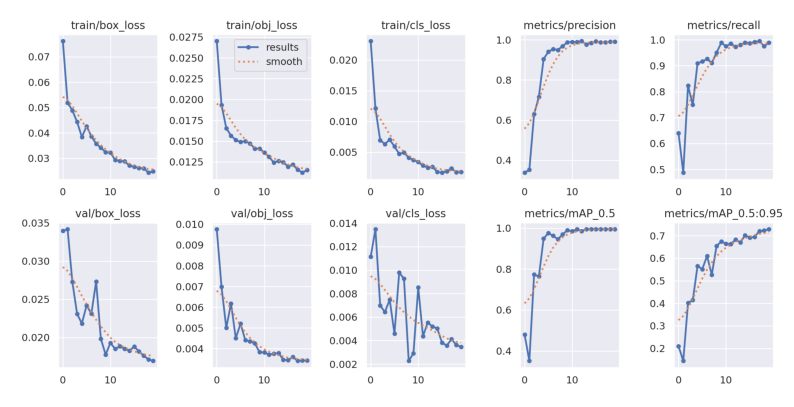

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('runs/train/exp/results.png')

# Display it
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('runs/train/exp/results.csv')


In [31]:
df.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.076173,0.027019,0.023082,0.33830,0.64009,0.47968,0.21017,0.033964,0.009764,0.011132,0.070326,0.003297,0.003297
1,1,0.051894,0.019347,0.012127,0.35255,0.48736,0.35145,0.14464,0.034193,0.006982,0.013484,0.039998,0.006302,0.006302
2,2,0.048862,0.016557,0.006939,0.62984,0.82301,0.77372,0.40133,0.027285,0.005003,0.006978,0.009340,0.008977,0.008977
3,3,0.044302,0.015654,0.006334,0.71613,0.74902,0.76372,0.41419,0.023075,0.006181,0.006432,0.008515,0.008515,0.008515
4,4,0.038381,0.015131,0.007057,0.90455,0.90970,0.94920,0.56585,0.021829,0.004506,0.007491,0.008515,0.008515,0.008515


In [32]:
print(df.columns.tolist())


['               epoch', '      train/box_loss', '      train/obj_loss', '      train/cls_loss', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss', '        val/obj_loss', '        val/cls_loss', '               x/lr0', '               x/lr1', '               x/lr2']


In [26]:
df.columns = df.columns.str.strip()

In [27]:
# Epochs
epochs = df['epoch']

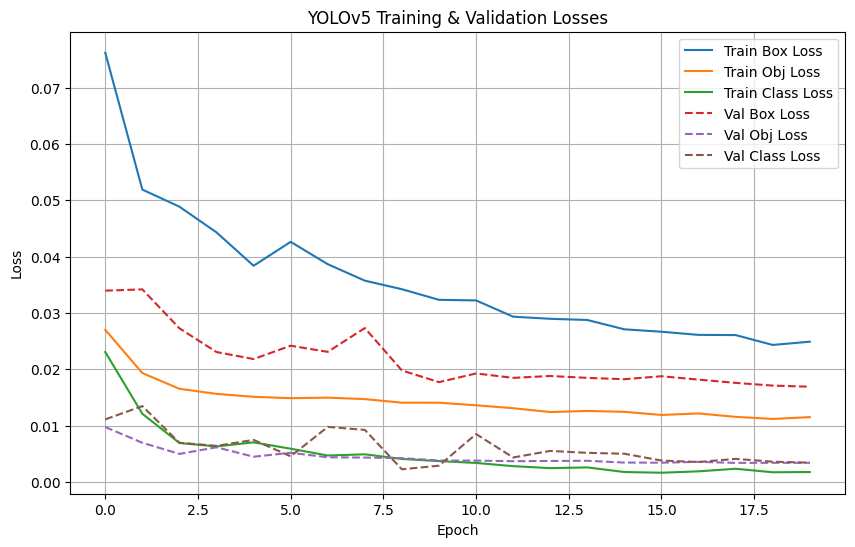

In [28]:
# Plot losses
plt.figure(figsize=(10,6))
plt.plot(epochs, df['train/box_loss'], label='Train Box Loss')
plt.plot(epochs, df['train/obj_loss'], label='Train Obj Loss')
plt.plot(epochs, df['train/cls_loss'], label='Train Class Loss')
plt.plot(epochs, df['val/box_loss'], '--', label='Val Box Loss')
plt.plot(epochs, df['val/obj_loss'], '--', label='Val Obj Loss')
plt.plot(epochs, df['val/cls_loss'], '--', label='Val Class Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('YOLOv5 Training & Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

# Model Validation

In [8]:
!python val.py --weights runs/train/exp/weights/best.pt --data /content/drive/MyDrive/glovedataset/hands.yaml


val: data=/content/drive/MyDrive/glovedataset/hands.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-429-g50313d30 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/glovedataset/valid/labels.cache... 138 images, 0 backgrounds, 0 corrupt: 100% 138/138 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:04<00:00,  1.02it/s]
                   all        138        140      0.991      0.989      0.995      0.729
           gloved_hand        138         38      0.992          1      0.995   

In [43]:
!ls runs/val/exp

confusion_matrix.png  R_curve.png	     val_batch1_pred.jpg
F1_curve.png	      val_batch0_labels.jpg  val_batch2_labels.jpg
P_curve.png	      val_batch0_pred.jpg    val_batch2_pred.jpg
PR_curve.png	      val_batch1_labels.jpg


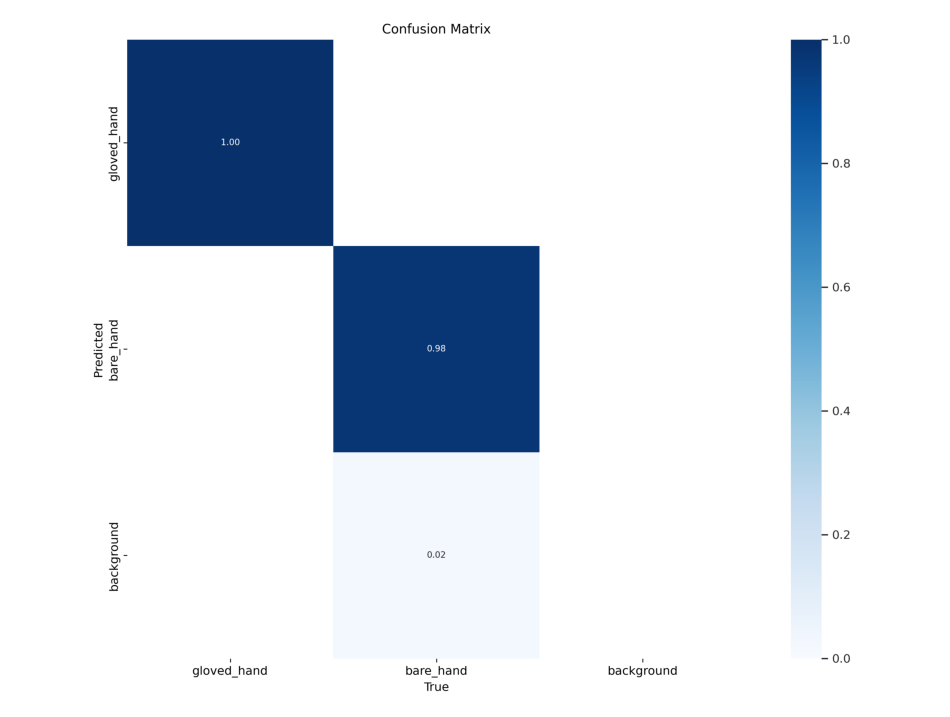

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('runs/train/exp/confusion_matrix.png')

plt.figure(figsize=(12,12))  # Increase figure size
plt.imshow(img)
plt.axis('off')
plt.show()


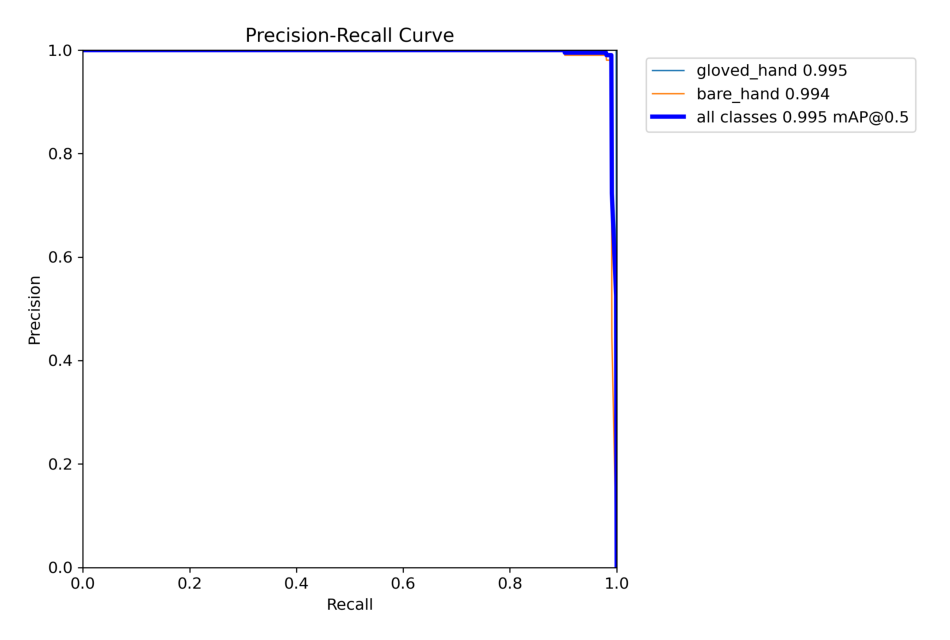

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('runs/train/exp/PR_curve.png')

plt.figure(figsize=(12,12))  # Increase figure size
plt.imshow(img)
plt.axis('off')
plt.show()


# Testing the Model on Test Dataset

In [9]:
!python detect.py --weights runs/train/exp/weights/best.pt --source /content/drive/MyDrive/glovedataset/test/images --save-txt --save-conf


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/glovedataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-429-g50313d30 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/108 /content/drive/MyDrive/glovedataset/test/images/20220225_103259_jpg.rf.365765f491604a7376af4e8cf00f6d8b.jpg: 640x640 1 bare_hand, 11.4ms
image 2/108 /content/drive/MyDrive/glovedataset/test/images/IMG20220224160807-1-_jpg.rf.0e6b5ef655e3ff4afbbd67f049b6a63b.jpg: 640x640 1 bar

In [10]:
!ls runs/detect/exp


20220225_103259_jpg.rf.365765f491604a7376af4e8cf00f6d8b.jpg
IMG20220224160807-1-_jpg.rf.0e6b5ef655e3ff4afbbd67f049b6a63b.jpg
IMG20220224160840_jpg.rf.354959c9070c5b86c661a533feae83a6.jpg
IMG20220224160928_jpg.rf.204ebb54112b265c2cecf3ff209ae236.jpg
IMG20220224162653_jpg.rf.d74c1b8b73da34dd9456cf46bc29a6c6.jpg
IMG20220224164705_jpg.rf.1f6ff0527f786e18ad04ffb61c3cb0f9.jpg
IMG20220224170028_jpg.rf.4957f65b4089c279ace77bbb3d34c691.jpg
IMG20220224172210_jpg.rf.893fde2d2ef4e33ab0acbab260c8d905.jpg
IMG20220224231707_jpg.rf.f60de50d501f2d9d61e34961d88da3a3.jpg
IMG20220224231747_jpg.rf.d535d78c22b438ce8fb8bece76f496c5.jpg
IMG20220224231810_jpg.rf.0c349d0d241e5ec1817736f67cbc3cdd.jpg
IMG20220224232012_jpg.rf.0304370a9cb7ab0365baccb6705fad26.jpg
IMG20220224232021_jpg.rf.b724cfe3ab00f37c5a9288c2b3f377e6.jpg
IMG20220224232248_jpg.rf.dbe8ad7434f3887c08a6f4411ac4c5b5.jpg
IMG20220224232413_jpg.rf.80c61424996d5762ac68996541ad7a37.jpg
IMG20220225102042_jpg.rf.e4739c623a82a61e6ebd8b792fb73c1e.jpg
IMG2022

In [11]:
!ls runs/detect/exp/labels


20220225_103259_jpg.rf.365765f491604a7376af4e8cf00f6d8b.txt
IMG20220224160807-1-_jpg.rf.0e6b5ef655e3ff4afbbd67f049b6a63b.txt
IMG20220224160840_jpg.rf.354959c9070c5b86c661a533feae83a6.txt
IMG20220224160928_jpg.rf.204ebb54112b265c2cecf3ff209ae236.txt
IMG20220224162653_jpg.rf.d74c1b8b73da34dd9456cf46bc29a6c6.txt
IMG20220224164705_jpg.rf.1f6ff0527f786e18ad04ffb61c3cb0f9.txt
IMG20220224170028_jpg.rf.4957f65b4089c279ace77bbb3d34c691.txt
IMG20220224172210_jpg.rf.893fde2d2ef4e33ab0acbab260c8d905.txt
IMG20220224231707_jpg.rf.f60de50d501f2d9d61e34961d88da3a3.txt
IMG20220224231747_jpg.rf.d535d78c22b438ce8fb8bece76f496c5.txt
IMG20220224231810_jpg.rf.0c349d0d241e5ec1817736f67cbc3cdd.txt
IMG20220224232012_jpg.rf.0304370a9cb7ab0365baccb6705fad26.txt
IMG20220224232021_jpg.rf.b724cfe3ab00f37c5a9288c2b3f377e6.txt
IMG20220224232248_jpg.rf.dbe8ad7434f3887c08a6f4411ac4c5b5.txt
IMG20220224232413_jpg.rf.80c61424996d5762ac68996541ad7a37.txt
IMG20220225102042_jpg.rf.e4739c623a82a61e6ebd8b792fb73c1e.txt
IMG2022

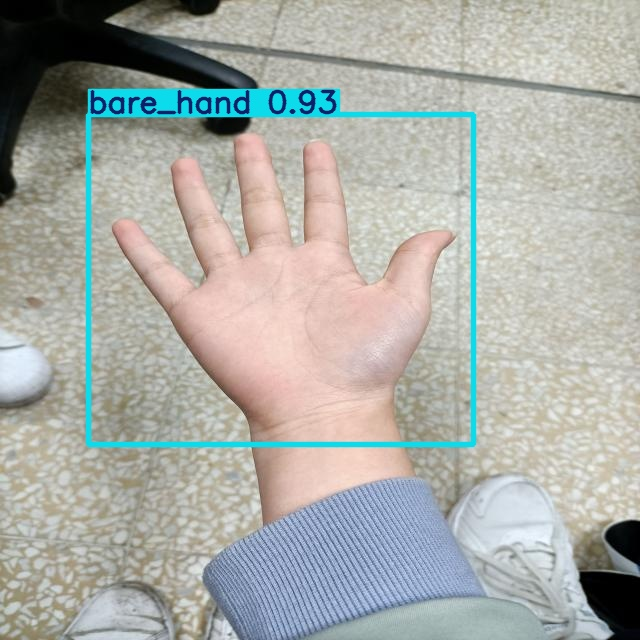

In [13]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("runs/detect/exp/IMG20220224160807-1-_jpg.rf.0e6b5ef655e3ff4afbbd67f049b6a63b.jpg")
cv2_imshow(img)


In [33]:
!cp -r runs/detect/exp /content/drive/MyDrive/yolov5_glovehand_detection_results


### Saving the Results in JSON Format

In [34]:
import os
import json

# Paths
labels_dir = "runs/detect/exp/labels"   # YOLOv5 saved detection txt files here
images_dir = "runs/detect/exp"          # where the images are
output_json_dir = "runs/detect/exp/json_results" #save the json results here

# Make output folder
os.makedirs(output_json_dir, exist_ok=True)

# Class names (from your dataset YAML)
class_names = ["gloved_hand", "bare_hand"]

def convert_to_json(txt_file):
    detections = []
    filename = os.path.basename(txt_file).replace(".txt", ".jpg")

    with open(txt_file, "r") as f:
        for line in f.readlines():
            cls, x_center, y_center, w, h, conf = map(float, line.strip().split())

            # Convert YOLO format (cx, cy, w, h normalized) → (x1, y1, x2, y2 absolute)
            img_path = os.path.join(images_dir, filename)
            if not os.path.exists(img_path):
                continue  # skip if image not found

            import cv2
            img = cv2.imread(img_path)
            H, W = img.shape[:2]

            x1 = int((x_center - w/2) * W)
            y1 = int((y_center - h/2) * H)
            x2 = int((x_center + w/2) * W)
            y2 = int((y_center + h/2) * H)

            detections.append({
                "label": class_names[int(cls)],
                "confidence": round(conf, 3),
                "bbox": [x1, y1, x2, y2]
            })

    return {"filename": filename, "detections": detections}

# Process all txt files
for txt_file in os.listdir(labels_dir):
    if txt_file.endswith(".txt"):
        json_data = convert_to_json(os.path.join(labels_dir, txt_file))
        out_file = os.path.join(output_json_dir, txt_file.replace(".txt", ".json"))
        with open(out_file, "w") as jf:
            json.dump(json_data, jf, indent=2)

print(f" JSON detections saved in: {output_json_dir}")


 JSON detections saved in: runs/detect/exp/json_results


# Saving Detection Results

In [35]:
!cp -r runs/detect/exp/json_results /content/drive/MyDrive/yolov5_glovehand_detection_json_results


In [36]:
!zip -r /content/glove_yolov5_training.zip /content/yolov5/runs/train/exp


  adding: content/yolov5/runs/train/exp/ (stored 0%)
  adding: content/yolov5/runs/train/exp/confusion_matrix.png (deflated 35%)
  adding: content/yolov5/runs/train/exp/results.png (deflated 8%)
  adding: content/yolov5/runs/train/exp/val_batch2_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp/results.csv (deflated 82%)
  adding: content/yolov5/runs/train/exp/opt.yaml (deflated 49%)
  adding: content/yolov5/runs/train/exp/events.out.tfevents.1756102112.7c2560e8fae5.961.0 (deflated 36%)
  adding: content/yolov5/runs/train/exp/P_curve.png (deflated 18%)
  adding: content/yolov5/runs/train/exp/labels.jpg (deflated 25%)
  adding: content/yolov5/runs/train/exp/train_batch2.jpg (deflated 3%)
  adding: content/yolov5/runs/train/exp/weights/ (stored 0%)
  adding: content/yolov5/runs/train/exp/weights/last.pt (deflated 9%)
  adding: content/yolov5/runs/train/exp/weights/best.pt (deflated 9%)
  adding: content/yolov5/runs/train/exp/val_batch2_labels.jpg (deflated 8%)
  adding: cont

# Saving Training Results

In [38]:
!cp /content/glove_yolov5_training.zip /content/drive/MyDrive/yolov5_training


In [39]:
from google.colab import files
files.download('/content/drive/MyDrive/glove_yolov5_training.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Saving Validation Results

In [51]:
!zip -r /content/glove_yolov5_valid.zip /content/yolov5/runs/val/exp


  adding: content/yolov5/runs/val/exp/ (stored 0%)
  adding: content/yolov5/runs/val/exp/confusion_matrix.png (deflated 35%)
  adding: content/yolov5/runs/val/exp/val_batch2_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/val/exp/P_curve.png (deflated 19%)
  adding: content/yolov5/runs/val/exp/val_batch2_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/val/exp/val_batch1_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/val/exp/R_curve.png (deflated 14%)
  adding: content/yolov5/runs/val/exp/val_batch0_labels.jpg (deflated 7%)
  adding: content/yolov5/runs/val/exp/val_batch0_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/val/exp/val_batch1_labels.jpg (deflated 7%)
  adding: content/yolov5/runs/val/exp/F1_curve.png (deflated 13%)
  adding: content/yolov5/runs/val/exp/PR_curve.png (deflated 24%)


In [63]:
!cp /content/glove_yolov5_valid.zip /content/drive/MyDrive/


In [64]:
from google.colab import files
files.download('/content/drive/MyDrive/glove_yolov5_valid.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>